<h1> Soft k-means para Mistura de Gaussianas </h1>

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
#PACOTES UTILIZADOS
import math
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as stats

In [3]:
#ENTRADAS
d = 3 #dimensao dos dados
N = 1000 #quantidade de dados
k = 3 #quantidade de clusters

<h2> Vamos gerar uma mistura de Gaussianas Multivariadas </h2>

<ol type='1'>
<li> Defina aleatóriamente os pesos dos cluster $p=(p_1,\ldots,p_k)$, com $p_j\in (0,1)$ e $\sum_j p_j=1$.
<li> Para cada cluster, considere vetor de médias gerados uniformemente, $\mu = (\mu_1,\ldots,\mu_k)$.
<li> Vamos gerar matrizes de covariâncias: 
    <ol type = 'a'>
    <li> considere uma matriz uniforme
    <li> faça a decomposição $QR$
    <li> fixe uma matriz diagonal Diag (com entradas positivas) 
    <li> defina a matriz de covariância por $\Sigma = QˆT * Diag * Q$
    </ol>
<li> Defina a lista de parâmetros por param = [media, covariancia, peso], para cada cluster.
</ol>

Resultado: <b> Mistura de Gaussianas</b>:
$$p(x;param) = \sum_j\mathcal{N(x \mid \mu_j,\Sigma_j)\,p_j}$$

In [9]:
def gera_param(k,d):
    
    param = []

    p = [np.random.uniform(1,9) for _ in range(k)]
    p = p/np.sum(p) #vetor de pesos

    #p = np.random.dirichlet(np.ones(k), size=1)
    #p = p[0]

    for h in range(k):
        m = np.random.uniform(0,10,d) #medias
        a = np.random.rand(d,d)
        q,r = np.linalg.qr(a)
        cov = np.dot(q.T,np.dot(np.diag(np.random.uniform(0.1,0.9,d)),q)) #matrizes de covariancia
        param.append([m,cov,p[h]])


    return param

param = gera_param(k,d)
par_orig = param

param

[[array([ 9.65754826,  9.10533628,  0.5065607 ]),
  array([[ 0.27533313,  0.01654628,  0.12637572],
         [ 0.01654628,  0.16974777,  0.02258024],
         [ 0.12637572,  0.02258024,  0.31996468]]),
  0.3015069359335944],
 [array([ 3.60543962,  2.76979756,  2.91007914]),
  array([[ 0.6923468 , -0.09474552,  0.06698367],
         [-0.09474552,  0.27264213, -0.20260829],
         [ 0.06698367, -0.20260829,  0.45598575]]),
  0.28437240327882396],
 [array([ 7.96316214,  4.45363697,  5.66749492]),
  array([[ 0.20154847,  0.12506019,  0.02191133],
         [ 0.12506019,  0.69026946,  0.22723273],
         [ 0.02191133,  0.22723273,  0.25569563]]),
  0.4141206607875817]]

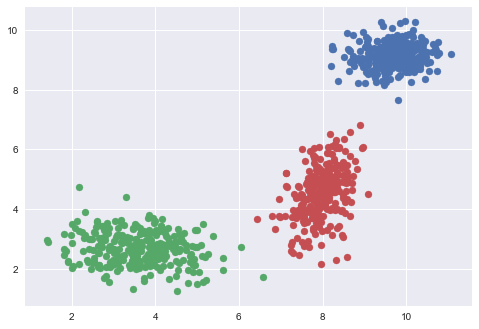

In [10]:
def normal(x,par):
    m,cov,peso = par[0],par[1],par[2]
    return stats.multivariate_normal.pdf(x,m,cov)*peso

D = {}
p = []
for h in range(k):
    mean = param[h][0]
    cov = param[h][1]
    D[h] = np.random.multivariate_normal(mean, cov, N)
    p.extend([param[h][2]/N for _ in range(N)])
        
datac = []
c = []
for h in range(k):
    datac.extend(D[h])
    c.extend([h for _ in D[h]])
datac = pd.concat([pd.Series(datac),pd.Series(c)], axis=1)
datac.columns = ['medias','cluster']
dtind = np.random.choice(datac.index,N,p)
datac = datac[datac.index.isin(dtind)]

data = datac['medias'].tolist()

for h in range(k):
    datah = datac.loc[datac.cluster == h]
    x = [item[0] for item in datah.medias]
    y = [item[1] for item in datah.medias]
    plt.scatter(x,y)

plt.show()

<h3> Novos parametros e pesos serão gerados. </h3>
Deve-se saber se o algoritmo será capaz de capturar as informações originais,<br>
partindo apenas das informações dos dados.


In [11]:
#PARAMETROS GERADOS ALEATORIAMENTE
param = []
p = [np.random.uniform(1,9) for _ in range(k)]
p = p/np.sum(p) #vetor de pesos
#p = np.random.dirichlet(np.ones(k), size=1)
#p = p[0]

for h in range(k):
    m = np.random.uniform(0,10,d) #medias
    a = np.random.rand(d,d)
    q,r = np.linalg.qr(a)
    cov = np.dot(q.T,np.dot(np.diag(np.random.uniform(0.1,0.9,d)),q)) #matrizes de covariancia
    param.append([m,cov,p[h]])
param

[[array([ 9.00860855,  2.72579105,  2.92012534]),
  array([[ 0.7026982 , -0.05102   ,  0.05202402],
         [-0.05102   ,  0.48238983, -0.0124436 ],
         [ 0.05202402, -0.0124436 ,  0.46461737]]),
  0.52427692670913462],
 [array([ 5.73342737,  8.60160507,  7.43628404]),
  array([[ 0.44264544,  0.04339032,  0.17421133],
         [ 0.04339032,  0.49581915, -0.09031376],
         [ 0.17421133, -0.09031376,  0.57888782]]),
  0.068191544901484727],
 [array([ 4.62514754,  2.27056139,  5.71813516]),
  array([[ 0.36200564,  0.14476631, -0.06801332],
         [ 0.14476631,  0.50954341,  0.09434239],
         [-0.06801332,  0.09434239,  0.58458068]]),
  0.40753152838938056]]

In [12]:
#PARAMETROS ORIGINAIS - QUE GERARAM OS DADOS
par_orig

[[array([ 9.65754826,  9.10533628,  0.5065607 ]),
  array([[ 0.27533313,  0.01654628,  0.12637572],
         [ 0.01654628,  0.16974777,  0.02258024],
         [ 0.12637572,  0.02258024,  0.31996468]]),
  0.3015069359335944],
 [array([ 3.60543962,  2.76979756,  2.91007914]),
  array([[ 0.6923468 , -0.09474552,  0.06698367],
         [-0.09474552,  0.27264213, -0.20260829],
         [ 0.06698367, -0.20260829,  0.45598575]]),
  0.28437240327882396],
 [array([ 7.96316214,  4.45363697,  5.66749492]),
  array([[ 0.20154847,  0.12506019,  0.02191133],
         [ 0.12506019,  0.69026946,  0.22723273],
         [ 0.02191133,  0.22723273,  0.25569563]]),
  0.4141206607875817]]

In [13]:
def Epasso(D,dens,param):
    N = len(D)
    k = len(param)
    q = np.zeros((k,N))
    for i in range(N):            
        v = np.array([dens(D[i],param[h]) for h in range(k)])
        v = v/np.sum(v)
        for h in range(k):
            q[h,i] = v[h]
    return q

def Mpasso(D,q,param):
    N = len(D)
    k = len(param)
    new_param = []
    for h in range(k):
        peso = (1/N)*np.sum([q[h,i] for i in range(N)])
        med = (1/N)*sum([q[h,i]*D[i] for i in range(N)])/peso
        cov = (1/N)*sum([q[h,i]*np.dot(np.matrix(D[i]).T, np.matrix(D[i])) 
                         for i in range(N)])/peso - np.dot(np.matrix(med).T, np.matrix(med))
        new_param.append([med, cov, peso])
    return new_param

In [14]:
it = 0
while it < 100: 
    print(it)
    try:
        q = Epasso(data,normal,param)
        param = Mpasso(data,q,param)
        it+=1
    except:
        print('matriz singular - novos parametros gerados')
        param = gera_param(k,d)
        it = 0

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [15]:
param

[[array([ 9.67553996,  9.14067595,  0.51240881]),
  matrix([[ 0.27486821,  0.0236295 ,  0.13433822],
          [ 0.0236295 ,  0.17219613,  0.01880779],
          [ 0.13433822,  0.01880779,  0.31890561]]),
  0.33687943262411346],
 [array([ 7.96699618,  4.53184379,  5.6813173 ]),
  matrix([[ 0.18249741,  0.14612557,  0.03794527],
          [ 0.14612557,  0.74953492,  0.23316925],
          [ 0.03794527,  0.23316925,  0.26226579]]),
  0.31678522222140609],
 [array([ 3.60963014,  2.69648797,  2.95232662]),
  matrix([[ 0.75536421, -0.08207242,  0.0590085 ],
          [-0.08207242,  0.283829  , -0.21511293],
          [ 0.0590085 , -0.21511293,  0.44248397]]),
  0.3463353451544805]]

In [16]:
par_orig

[[array([ 9.65754826,  9.10533628,  0.5065607 ]),
  array([[ 0.27533313,  0.01654628,  0.12637572],
         [ 0.01654628,  0.16974777,  0.02258024],
         [ 0.12637572,  0.02258024,  0.31996468]]),
  0.3015069359335944],
 [array([ 3.60543962,  2.76979756,  2.91007914]),
  array([[ 0.6923468 , -0.09474552,  0.06698367],
         [-0.09474552,  0.27264213, -0.20260829],
         [ 0.06698367, -0.20260829,  0.45598575]]),
  0.28437240327882396],
 [array([ 7.96316214,  4.45363697,  5.66749492]),
  array([[ 0.20154847,  0.12506019,  0.02191133],
         [ 0.12506019,  0.69026946,  0.22723273],
         [ 0.02191133,  0.22723273,  0.25569563]]),
  0.4141206607875817]]

<h2> K-means ++ : Uma boa escolha inicial dos parametros.

In [17]:
tam = 50 #quantidade de vizinhos a considerar

prob = np.array([1/len(data) for _ in data])
m = data[np.random.choice(len(data),p=prob)]
C = [[m, np.identity(k),0]]
dist = scipy.spatial.distance.mahalanobis

df = pd.DataFrame([[a,dist(a,m,np.identity(k))] for a in data])
df.columns = ['data','dist']
knn = df.sort_values('dist').reset_index()
knn = knn[knn.index<=50]
m = knn.data.mean()
cv = sum([np.dot(np.matrix(v).T, np.matrix(v)) for v in knn.data])/len(knn.data) - np.dot(np.matrix(m).T,np.matrix(m))

C = [[m,cv,0]]

for _ in range(1,k):
    prob = [min([dist(a,k[0],k[1])[0,0] for k in C]) for a in data]
    prob = prob/sum(prob)
    prob = prob.tolist()
    m = data[np.random.choice(len(data),p=prob)]

    df = pd.DataFrame([[a, dist(a,m,np.identity(k))] for a in data])
    df.columns = ['data','dist']
    knn = df.sort_values('dist').reset_index()
    knn = knn[knn.index<=50]
    m = knn.data.mean()
    cv = sum([np.dot(np.matrix(v).T, np.matrix(v)) for v in knn.data])/len(knn.data) - np.dot(np.matrix(m).T,np.matrix(m))
    C.append([m,cv,0])

NC = []
for k in range(k):
    df = pd.DataFrame([[a,np.argmin([dist(a,k[0],k[1])[0,0] for k in C])] for a in data])
    df.columns = ['data','cluster']
    dfc = df.loc[df.cluster == k]
    mc = dfc.data.mean()
    cvc = sum([np.dot(np.matrix(a).T,np.matrix(a)) for a in dfc.data])/len(dfc) - np.dot(np.matrix(mc).T,np.matrix(mc))
    pc = len(dfc)/len(data)
    NC.append([mc,cvc,pc])
NC

[[array([ 4.68752497,  2.10519917,  3.74842845]),
  matrix([[ 0.14186044, -0.01318721, -0.0023033 ],
          [-0.01318721,  0.13529891, -0.05573502],
          [-0.0023033 , -0.05573502,  0.1745444 ]]),
  0.03664302600472813],
 [array([ 8.84753072,  6.90710248,  3.01741493]),
  matrix([[ 0.95918994,  2.049725  , -2.11811803],
          [ 2.049725  ,  5.75729444, -5.82734021],
          [-2.11811803, -5.82734021,  6.96455215]]),
  0.6536643026004728],
 [array([ 3.48209554,  2.76644831,  2.85813099]),
  matrix([[ 0.67422093, -0.00589265, -0.04728504],
          [-0.00589265,  0.25514222, -0.17168377],
          [-0.04728504, -0.17168377,  0.3903235 ]]),
  0.30969267139479906]]

In [18]:
par_orig

[[array([ 9.65754826,  9.10533628,  0.5065607 ]),
  array([[ 0.27533313,  0.01654628,  0.12637572],
         [ 0.01654628,  0.16974777,  0.02258024],
         [ 0.12637572,  0.02258024,  0.31996468]]),
  0.3015069359335944],
 [array([ 3.60543962,  2.76979756,  2.91007914]),
  array([[ 0.6923468 , -0.09474552,  0.06698367],
         [-0.09474552,  0.27264213, -0.20260829],
         [ 0.06698367, -0.20260829,  0.45598575]]),
  0.28437240327882396],
 [array([ 7.96316214,  4.45363697,  5.66749492]),
  array([[ 0.20154847,  0.12506019,  0.02191133],
         [ 0.12506019,  0.69026946,  0.22723273],
         [ 0.02191133,  0.22723273,  0.25569563]]),
  0.4141206607875817]]

In [22]:
param = NC
it = 0
while it < 100: 
    print(it)
    try:
        q = Epasso(data,normal,param)
        param = Mpasso(data,q,param)
        it+=1
    except:
        print('matriz singular - novos parametros gerados')
        param = gera_param(k,d)
        it = 0

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [23]:
param

[[array([ 4.44340006,  2.75959584,  3.28144212]),
  matrix([[ 0.2027572 , -0.30114195,  0.22229435],
          [-0.30114195,  0.47630163, -0.31289139],
          [ 0.22229435, -0.31289139,  0.26504136]]),
  0.021610291967011093],
 [array([ 8.84753814,  6.90714447,  3.0174037 ]),
  matrix([[ 0.95919277,  2.04970806, -2.118127  ],
          [ 2.04970806,  5.75714613, -5.82733837],
          [-2.118127  , -5.82733837,  6.96459978]]),
  0.65365851903371319],
 [array([ 3.55422502,  2.69227747,  2.93044797]),
  matrix([[ 0.74314031, -0.07127254,  0.02876938],
          [-0.07127254,  0.27073849, -0.21008906],
          [ 0.02876938, -0.21008906,  0.44662744]]),
  0.32473118899927561]]

In [21]:
par_orig

[[array([ 9.65754826,  9.10533628,  0.5065607 ]),
  array([[ 0.27533313,  0.01654628,  0.12637572],
         [ 0.01654628,  0.16974777,  0.02258024],
         [ 0.12637572,  0.02258024,  0.31996468]]),
  0.3015069359335944],
 [array([ 3.60543962,  2.76979756,  2.91007914]),
  array([[ 0.6923468 , -0.09474552,  0.06698367],
         [-0.09474552,  0.27264213, -0.20260829],
         [ 0.06698367, -0.20260829,  0.45598575]]),
  0.28437240327882396],
 [array([ 7.96316214,  4.45363697,  5.66749492]),
  array([[ 0.20154847,  0.12506019,  0.02191133],
         [ 0.12506019,  0.69026946,  0.22723273],
         [ 0.02191133,  0.22723273,  0.25569563]]),
  0.4141206607875817]]